In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
dataset=pd.read_csv("reviews_dataset.csv",encoding='latin1')

In [3]:
dataset.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,Unnamed: 19,Unnamed: 20
0,airasia,A320,"| According their check in process, they men...",Oct-22,1,1.0,1,1.0,NaN,9th November 2022,"""They should bring more food""",(Malaysia),Krabi to Kuala Lumpur,1,Economy Class,3,Solo Leisure,2,1.0,NaN,NaN
1,airasia,NaN,"? , | Nice, uneventful short flight, clean air...",Nov-22,0,0.0,5,9.0,yes,7th November 2022,"""Nice, uneventful short flight""",(Malaysia),Udon Thani to Bangkok,4,Economy Class,5,Solo Leisure,5,0.0,NaN,NaN
2,airasia,A320,"? , | Never again with AirAsia. I wish I could...",Nov-22,0,1.0,1,1.0,NaN,6th November 2022,"""Never again with AirAsia""",(Malaysia),Bangkok (Don Muang) to Jakarta,1,Economy Class,1,Solo Leisure,2,0.0,NaN,NaN
3,airasia,NaN,"? , | My wife has problems with her knees and...",Oct-22,0,0.0,1,2.0,yes,2nd November 2022,"""when it was time to board no wheelchair""",(Malaysia),Penang to Danang via Kuala Lumpur,1,Economy Class,1,Couple Leisure,1,0.0,NaN,NaN
4,airasia,NaN,"? , | My flight was suppose to be at 4.35 pm ...",Oct-22,0,0.0,1,1.0,NaN,1st November 2022,"""a very bad experience for me""",(Malaysia),Singapore to Kuala lumpur,1,Economy Class,1,Solo Leisure,1,0.0,NaN,NaN


In [4]:
dataset.count()

AirName                19534
AircraftModel           6371
Comments               19534
DateFlown              15961
EntertainmentRating    19534
FoodRating             19532
GroundServiceRating    19534
OverallScore           19136
Recommended             7587
ReviewDate             19534
ReviewTitle            19534
ReviewrCountry         19534
Route                  15898
SeatComfortRating      19534
SeatType               19404
ServiceRating          19534
TravelType             15979
ValueRating            19534
WifiRating             19532
Unnamed: 19                2
Unnamed: 20                2
dtype: int64

In [5]:
dataset.describe

<bound method NDFrame.describe of                AirName AircraftModel  \
0              airasia          A320   
1              airasia           NaN   
2              airasia          A320   
3              airasia           NaN   
4              airasia           NaN   
...                ...           ...   
19529  united-airlines    Boeing 747   
19530  united-airlines           NaN   
19531  united-airlines           NaN   
19532  united-airlines           NaN   
19533  united-airlines           NaN   

                                                Comments DateFlown  \
0       |  According their check in process, they men...    Oct-22   
1      ? , | Nice, uneventful short flight, clean air...    Nov-22   
2      ? , | Never again with AirAsia. I wish I could...    Nov-22   
3      ? , |  My wife has problems with her knees and...    Oct-22   
4      ? , |  My flight was suppose to be at 4.35 pm ...    Oct-22   
...                                                  ...       ..

In [6]:
dataset.isna().sum()

AirName                    0
AircraftModel          13163
Comments                   0
DateFlown               3573
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             398
Recommended            11947
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3636
SeatComfortRating          0
SeatType                 130
ServiceRating              0
TravelType              3555
ValueRating                0
WifiRating                 2
Unnamed: 19            19532
Unnamed: 20            19532
dtype: int64

In [7]:
dataset.duplicated().sum()

586

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.drop(['Unnamed: 19','Unnamed: 20'], axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'FoodRating'}>,
        <AxesSubplot:title={'center':'GroundServiceRating'}>],
       [<AxesSubplot:title={'center':'OverallScore'}>,
        <AxesSubplot:title={'center':'ServiceRating'}>],
       [<AxesSubplot:title={'center':'ValueRating'}>,
        <AxesSubplot:title={'center':'WifiRating'}>]], dtype=object)

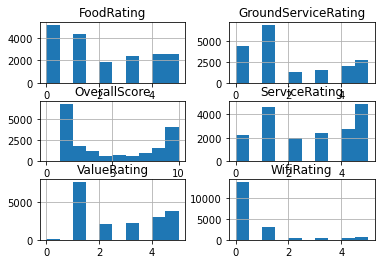

In [11]:
dataset.hist()

In [12]:
dataset.isna().sum()

AirName                    0
AircraftModel          12776
Comments                   0
DateFlown               3547
EntertainmentRating        0
FoodRating                 2
GroundServiceRating        0
OverallScore             393
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 2
dtype: int64

In [13]:
dataset.drop(['DateFlown','AircraftModel','FoodRating'], axis=1,inplace=True)

In [14]:
dataset.isna().sum()

AirName                    0
Comments                   0
EntertainmentRating        0
GroundServiceRating        0
OverallScore             393
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 2
dtype: int64

In [15]:
dataset['Recommended'] = dataset['Recommended'].interpolate()
dataset['OverallScore'] = dataset['OverallScore'].interpolate()
dataset['Route'] = dataset['Route'].interpolate()
dataset['SeatType'] = dataset['SeatType'].interpolate()
dataset['TravelType'] = dataset['TravelType'].interpolate()
dataset['WifiRating'] = dataset['WifiRating'].interpolate()
dataset['Recommended'] = dataset['Recommended'].interpolate()

In [16]:
dataset.isna().sum()

AirName                    0
Comments                   0
EntertainmentRating        0
GroundServiceRating        0
OverallScore               0
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 0
dtype: int64

In [17]:
dataset.describe

<bound method NDFrame.describe of                AirName                                           Comments  \
0              airasia   |  According their check in process, they men...   
1              airasia  ? , | Nice, uneventful short flight, clean air...   
2              airasia  ? , | Never again with AirAsia. I wish I could...   
3              airasia  ? , |  My wife has problems with her knees and...   
4              airasia  ? , |  My flight was suppose to be at 4.35 pm ...   
...                ...                                                ...   
19529  united-airlines   |  My whole experience this evening, from an ...   
19530  united-airlines  ? , |  United is the most unorganized airline ...   
19531  united-airlines   |  We flew from FL to Houston on February 25t...   
19532  united-airlines  ? , |  Stuck in Denver for almost 24 hours bec...   
19533  united-airlines  ? , |  We had a connecting flight through Newa...   

      EntertainmentRating  GroundServiceR

In [18]:
dataset["Recommended"].value_counts()

yes    7412
0         2
Name: Recommended, dtype: int64

In [19]:
dataset["OverallScore"].value_counts()

1.000000     6840
10.000000    2319
2.000000     1818
9.000000     1774
8.000000     1569
             ... 
5.666667        1
1.333333        1
1.666667        1
5.200000        1
4.666667        1
Name: OverallScore, Length: 97, dtype: int64

In [20]:
dataset["OverallScore"]=dataset["OverallScore"].astype(int)

In [21]:
dataset["OverallScore"].value_counts()

1     6858
10    2319
2     1843
9     1799
8     1600
3     1249
7     1030
5      826
4      721
6      701
0        2
Name: OverallScore, dtype: int64

In [22]:
dataset["Comments"].value_counts()

Flight from Seattle to Honolulu in an old Boeing 767 which was 26 years old. Crew was nice but service was normal. Seats were broken and legroom was ok lavatories showed their age and had a bad smell. Free food service that is not normal on us-carriers. Food was enough and the quality was fair. Took some time in Honolulu until we reached the gate almost 20 minutes after landing.                                                                                                                                                                                                                                                                                                                                                                               2
DEL-COK-DEL. Excellent flight both flights on time as we had pre-booked meals and seats check-in was a breeze. Overall highly recommended as a premium low cost carrier.                                                                                  

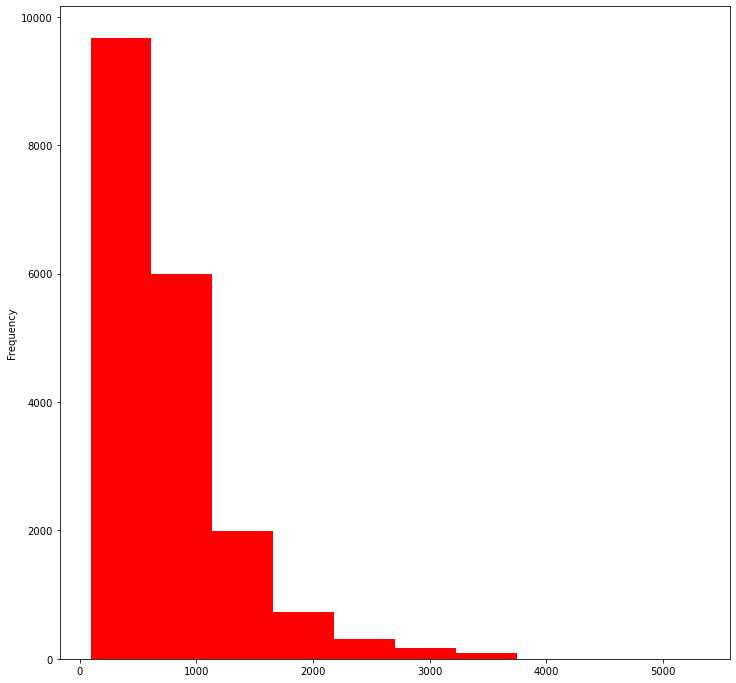

In [23]:
length_test = dataset['Comments'].str.len().plot.hist(color = 'red', figsize = (12, 12))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

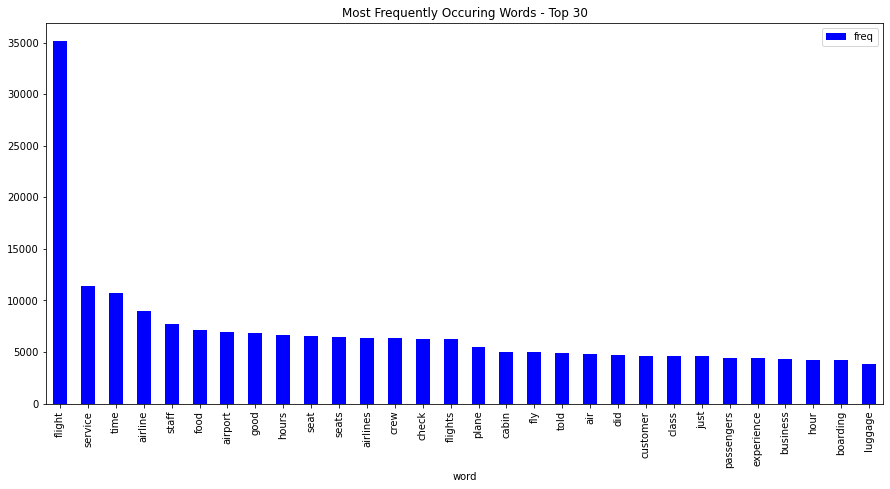

In [24]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset.Comments)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [25]:
# !pip install wordcloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

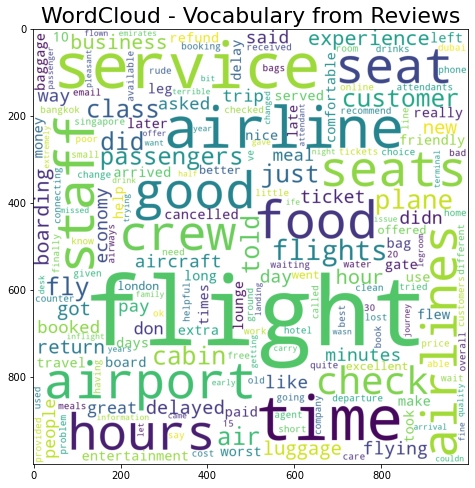

In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

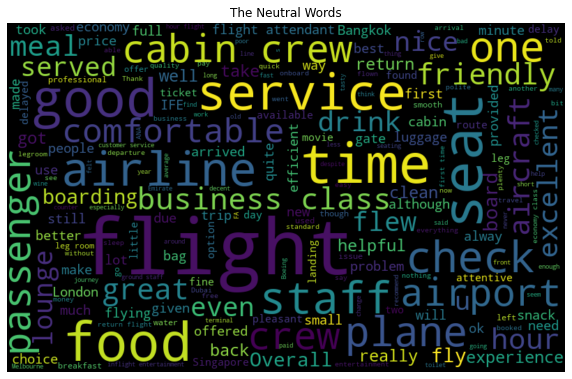

In [27]:
normal_words =' '.join([text for text in dataset['Comments'][dataset['OverallScore'] >= 5]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

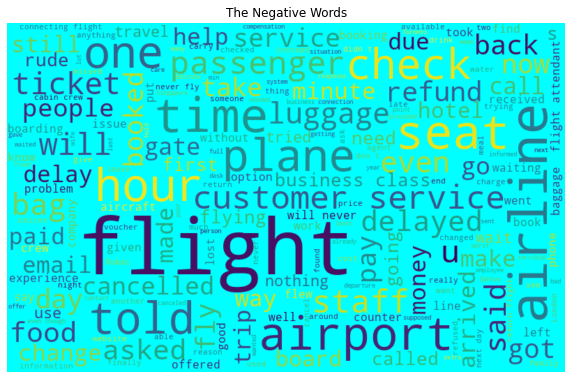

In [28]:
negative_words =' '.join([text for text in dataset['Comments'] [dataset['OverallScore'] < 5]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [29]:
import nltk
# nltk.download('stopwords')
# nltk.download()

In [36]:
dataset.insert(3,"Review", " ")


In [37]:
# removing unwanted patterns from the data

import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

df_corpus = []

for ind in dataset.index:
  review = re.sub('[^a-zA-Z]', ' ', dataset['Comments'][ind])
  review = review.lower()
  dataset['Comments'][ind]=review
  review = review.split()

  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  df_corpus.append(review)
  dataset['Review'][ind]=review

In [74]:
df_corpus[:5]

['accord check process mention abl start onlin check day departur howev realiti day make correct flight return krabi kuala lumpur inflight meal sold cabin crew mention left nasi lemak option make announc flight alreadi sky selangor know purpos make announc food sold flight prepar land bring food sinc notic restaur oper intern termin neo seat suck comfort',
 'nice unev short flight clean aircraft super nice crew left time arriv time neg park bit far away arriv dmk',
 'never airasia wish could given star come loyal custom pre pandem day airlin unfortun never recov pandem sector inbound outbound flight delay hour final land domest termin usher bu go intern walk way immigr wait luggag absolut horribl ruin day week',
 'wife problem knee great difficulti stair notifi person counter ask stair said said ok charg us wheelchair wheelchair brought said push declin sent someon layov kuala lumpur time board wheelchair long ramp climb stair anyway arriv danang wheelchair nowher contact custom servic

In [39]:
dataset.Comments[1]

'      nice  uneventful short flight  clean aircraft  super nice crew  left on time  arrived on time  only  negative   parked a bit far away from arrival at dmk '

In [40]:
dataset.isnull().sum()

AirName                    0
Comments                   0
EntertainmentRating        0
Review                     0
GroundServiceRating        0
OverallScore               0
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
Route                   3609
SeatComfortRating          0
SeatType                 127
ServiceRating              0
TravelType              3529
ValueRating                0
WifiRating                 0
dtype: int64

In [41]:
dataset.drop(['Route','TravelType'], axis=1,inplace=True)

In [42]:
dataset.isnull().sum()


AirName                    0
Comments                   0
EntertainmentRating        0
Review                     0
GroundServiceRating        0
OverallScore               0
Recommended            11534
ReviewDate                 0
ReviewTitle                0
ReviewrCountry             0
SeatComfortRating          0
SeatType                 127
ServiceRating              0
ValueRating                0
WifiRating                 0
dtype: int64

In [43]:
dataset.columns

Index(['AirName', 'Comments', 'EntertainmentRating', 'Review',
       'GroundServiceRating', 'OverallScore', 'Recommended', 'ReviewDate',
       'ReviewTitle', 'ReviewrCountry', 'SeatComfortRating', 'SeatType',
       'ServiceRating', 'ValueRating', 'WifiRating'],
      dtype='object')

In [44]:
dataset["Recommended"].value_counts()

yes    7412
0         2
Name: Recommended, dtype: int64

In [45]:
dataset['OverallScore'].value_counts()

1     6858
10    2319
2     1843
9     1799
8     1600
3     1249
7     1030
5      826
4      721
6      701
0        2
Name: OverallScore, dtype: int64

In [46]:
dataset['EntertainmentRating'].value_counts()    

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              8137
1                                                                                                                                                                   

In [47]:
df=pd.read_csv("reviews_dataset.csv",encoding='latin1')

In [48]:
df['EntertainmentRating'].value_counts()    

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              8385
1                                                                                                                                                                   

In [49]:
dataset.drop(dataset.index[dataset["EntertainmentRating"].apply(lambda x: not (x.strip().isnumeric()))], axis=0, inplace=True)

In [50]:
dataset['EntertainmentRating'].value_counts()   #>2

0    8137
1    3913
3    1947
4    1930
5    1661
2    1358
Name: EntertainmentRating, dtype: int64

In [51]:
dataset['GroundServiceRating'].value_counts() #>2

1    6882
0    4450
5    2773
4    2029
3    1506
2    1306
Name: GroundServiceRating, dtype: int64

In [52]:
 dataset['OverallScore'].value_counts() #>5

1     6858
10    2319
2     1843
9     1799
8     1600
3     1249
7     1030
5      826
4      721
6      701
Name: OverallScore, dtype: int64

In [53]:
 dataset['SeatComfortRating'].value_counts() #>2

1    4878
4    3471
3    3297
5    2731
2    2349
0    2220
Name: SeatComfortRating, dtype: int64

In [54]:
dataset['ServiceRating'].value_counts() #>2

5    4899
1    4615
4    2745
3    2445
0    2266
2    1976
Name: ServiceRating, dtype: int64

In [55]:
 dataset['ValueRating'].value_counts() #>2

1    7642
5    3825
4    3022
3    2207
2    2103
0     147
Name: ValueRating, dtype: int64

In [56]:
 dataset['WifiRating'].value_counts() #Impact of WifiRating in recommended column as 0 holds more than 13k is more

0.0    13854
1.0     3038
5.0      609
3.0      524
4.0      465
2.0      456
Name: WifiRating, dtype: int64

In [57]:
dataset["Recommended"].value_counts()

yes    7412
Name: Recommended, dtype: int64

In [58]:
for ind in dataset.index:
    if dataset["Recommended"][ind] == 'yes':
          dataset["Recommended"][ind]=1
    else:
          dataset["Recommended"][ind]=0

In [59]:
dataset["Recommended"].value_counts()


0    11534
1     7412
Name: Recommended, dtype: int64

In [60]:
dataset["Recommended"]=dataset["Recommended"].astype(int)

In [61]:
for ind in dataset.index:
    if dataset["Recommended"][ind] == 0:
        if dataset["EntertainmentRating"][ind] >'2':
            if dataset["GroundServiceRating"][ind] >2:
                if dataset["OverallScore"][ind] >5:
                    if dataset["SeatComfortRating"][ind] >'2':
                        if dataset["ServiceRating"][ind] >2:
                            if dataset["ValueRating"][ind] >2:
                                dataset["Recommended"][ind]=1

In [62]:
dataset["Recommended"].value_counts()

0    11504
1     7442
Name: Recommended, dtype: int64

<AxesSubplot:>

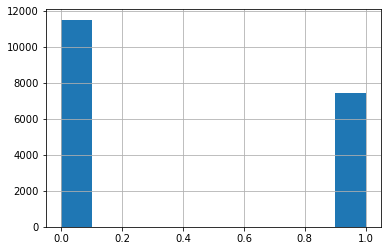

In [63]:
dataset["Recommended"].hist()

In [64]:
dataset.isnull().sum()

AirName                  0
Comments                 0
EntertainmentRating      0
Review                   0
GroundServiceRating      0
OverallScore             0
Recommended              0
ReviewDate               0
ReviewTitle              0
ReviewrCountry           0
SeatComfortRating        0
SeatType               125
ServiceRating            0
ValueRating              0
WifiRating               0
dtype: int64

In [65]:
dataset.dropna(inplace=True)

In [66]:
dataset.isnull().sum()

AirName                0
Comments               0
EntertainmentRating    0
Review                 0
GroundServiceRating    0
OverallScore           0
Recommended            0
ReviewDate             0
ReviewTitle            0
ReviewrCountry         0
SeatComfortRating      0
SeatType               0
ServiceRating          0
ValueRating            0
WifiRating             0
dtype: int64

In [67]:
dataset['ReviewDate'].value_counts()

4th August 2022       34
22nd May 2022         33
19th January 2015     32
14th July 2022        32
23rd July 2022        32
                      ..
21st February 2012     1
4th January 2012       1
22nd December 2011     1
20th December 2011     1
28th April 2010        1
Name: ReviewDate, Length: 3671, dtype: int64

In [68]:
import datetime

def dateconv(strr):
    
    # Parse the date string into a datetime object
    date_str = strr # 9th November 2022
    try:
        date = datetime.datetime.strptime(date_str, "%dth %B %Y")
    except ValueError:
        try:
            date = datetime.datetime.strptime(date_str, "%dst %B %Y")
        except ValueError:
            try:
                date = datetime.datetime.strptime(date_str, "%dnd %B %Y")
            except ValueError:
                try:
                    date = datetime.datetime.strptime(date_str, "%drd %B %Y") 
                except:
                    print(date_str)
                    print("something went wrong!")
    
    finally:
        # Extract the day, month, and year from the datetime object
        day = date.day
        month = date.month
        year = date.year

        # Convert the day, month, and year to strings, and pad with zeros as necessary
        day_str = str(day).zfill(2)
        month_str = str(month).zfill(2)
        year_str = str(year)[2:]

        # Concatenate the day, month, and year strings to create the final integer
        int_date = day_str + month_str + year_str
    #     print(int_date)  # Output: "091122"
    return int_date


In [69]:
for ind in dataset.index:
    try:
        if int(dataset["ReviewDate"][ind]) < 311223:
            continue
    except ValueError:
        dataset["ReviewDate"][ind]=dateconv(dataset["ReviewDate"][ind])

In [70]:
dataset['ReviewDate'].value_counts()

040822    34
220522    33
190115    32
140722    32
230722    32
          ..
210212     1
040112     1
221211     1
201211     1
280410     1
Name: ReviewDate, Length: 3671, dtype: int64

In [71]:
dataset.head()

,AirName,Comments,EntertainmentRating,Review,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,ValueRating,WifiRating
0,airasia,according their check in process they men...,1,accord check process mention abl start onlin c...,1,1,0,091122,"""They should bring more food""",(Malaysia),1,Economy Class,3,2,1.0
1,airasia,nice uneventful short flight clean air...,0,nice unev short flight clean aircraft super ni...,5,9,1,071122,"""Nice, uneventful short flight""",(Malaysia),4,Economy Class,5,5,0.0
2,airasia,never again with airasia i wish i could...,0,never airasia wish could given star come loyal...,1,1,0,061122,"""Never again with AirAsia""",(Malaysia),1,Economy Class,1,2,0.0
3,airasia,my wife has problems with her knees and...,0,wife problem knee great difficulti stair notif...,1,2,1,021122,"""when it was time to board no wheelchair""",(Malaysia),1,Economy Class,1,1,0.0
4,airasia,my flight was suppose to be at pm ...,0,flight suppos pm flight got delay pm wait half...,1,1,0,011122,"""a very bad experience for me""",(Malaysia),1,Economy Class,1,1,0.0


In [72]:
dataset.describe

<bound method NDFrame.describe of                AirName                                           Comments  \
0              airasia      according their check in process  they men...   
1              airasia        nice  uneventful short flight  clean air...   
2              airasia        never again with airasia  i wish i could...   
3              airasia         my wife has problems with her knees and...   
4              airasia         my flight was suppose to be at      pm ...   
...                ...                                                ...   
19529  united-airlines      my whole experience this evening  from an ...   
19530  united-airlines         united is the most unorganized airline ...   
19531  united-airlines      we flew from fl to houston on february   t...   
19532  united-airlines         stuck in denver for almost    hours bec...   
19533  united-airlines         we had a connecting flight through newa...   

      EntertainmentRating                

In [73]:
dataset.to_csv('ProcessedDataset.csv')